# MS/MS Analysis of CP-122721

In [42]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import venn
import matplotlib.pyplot as plt

#### Venn Diagram colors

In [5]:
default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

### Initialize variables

In [3]:
parentDTXSID = 'DTXSID9047251'
parentSMILES = r'COC1=CC=C(OC(F)(F)F)C=C1CN[C@H]1CCCN[C@H]1C1=CC=CC=C1'
parentINCHIKEY = Chem.MolToInchiKey(Chem.MolFromSmiles(parentSMILES))
root_dir = r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\CP-122721_CaseStudy'
MSMS_results = pd.read_csv(root_dir + r'\CFMID_Merged\MergedCFMIDResults.csv')

### Generate Identification DataFrame

In [6]:
identificationDF = pd.DataFrame(columns = ['Feature_Mass', 'Identifier', 'Identifier_Level', 'InChIKey' ,'Confidence', 'Formula_Score', 'MSMS_Score'])

### Predicted/Reported Metabolites list

In [7]:
aggregatedMetabolites = pd.read_csv(r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\metabolite_masterList.csv')

In [8]:
aggregatedMetabolites = aggregatedMetabolites[aggregatedMetabolites['Parent_DTXSID'] == parentDTXSID]
aggregatedMetabolites['INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in aggregatedMetabolites['SMILES']]
aggregatedMetabolites

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,INCHIKEY
1914,DTXSID9047251,NaN,C=O,CH2O,30.010565,False,True,0,0,1,1,0,WSFSSNUMVMOOMR-UHFFFAOYSA-N
1915,DTXSID9047251,NaN,COc1ccc(OC(F)(F)F)cc1CNC1C(O)CCNC1c1ccc(O)cc1,C20H23F3N2O4,412.160992,False,True,0,0,1,0,0,XNEQHGJZPNQJPO-UHFFFAOYSA-N
1916,DTXSID9047251,NaN,COc1ccc(OC(F)(F)F)cc1CNC1C(O)CCNC1c1ccccc1,C20H23F3N2O3,396.166077,False,True,0,0,1,1,0,LCYXJQLQOKHPDD-UHFFFAOYSA-N
1917,DTXSID9047251,NaN,COc1ccc(OC(F)(F)F)cc1CNC1CCCNC1C1=CC(O)C(O)C=C1,C20H25F3N2O4,414.176642,False,True,0,0,1,0,0,NFJZHAPWTCNVFJ-UHFFFAOYSA-N
1918,DTXSID9047251,NaN,COc1ccc(OC(F)(F)F)cc1CNC1CCCNC1C1=CC2OC2C=C1,C20H23F3N2O3,396.166077,False,True,0,0,1,0,0,TWVNCKBPSGYCCP-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,DTXSID9047251,DTXSID201025055,OC1=C(CN[C@H]2CCC(=O)N[C@H]2C2=CC=CC=C2)C=C(OC...,C19H19F3N2O3,380.134777,False,False,0,0,0,0,1,WTOFKKRGFDDJKR-YJBOKZPZSA-N
2056,DTXSID9047251,DTXSID701025305,COC1=C(C=C(OC(F)(F)F)C=C1)C(=O)N[C@H]1CCCN[C@H...,C20H21F3N2O3,394.150427,False,False,0,0,0,0,1,FZWWDTFJLHXJOB-WMZOPIPTSA-N
2057,DTXSID9047251,DTXSID601025302,COc1ccc(OC(F)(F)F)c(O)c1CNC1CCCNC1c1ccccc1,C20H23F3N2O3,396.166077,True,False,0,0,0,0,1,IRGCNWHHEPZXDG-UHFFFAOYSA-N
2058,DTXSID9047251,DTXSID601025302,COc1c(O)cc(OC(F)(F)F)cc1CNC1CCCNC1c1ccccc1,C20H23F3N2O3,396.166077,True,True,0,0,0,0,1,ANOWPINBSXXOTC-UHFFFAOYSA-N


### CFMID Identifications

In [9]:
MSMS_results

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
0,179.09194,DTXCID00233270,C6H9N7,CCN1N=NC2=C(N)N=C(N)N=C12,179.0948,0.210913,0.323918
1,179.09463,DTXCID10511617,C10H13NO2,CC(C)(C)C1=CC(=NC=C1)C(O)=O,179.0948,0.071567,0.109912
2,179.09463,DTXCID80871255,C10H13NO2,COC(=O)CC(N)C1=CC=CC=C1,179.0948,0.127717,0.196147
3,179.09463,DTXCID00410206,C10H13NO2,COC(=O)C(C#N)=C1CCCCC1,179.0948,0.062889,0.096584
4,179.09463,DTXCID4091865,C10H13NO2,COC(=O)CCCC1=CN=CC=C1,179.0948,0.100947,0.155033
...,...,...,...,...,...,...,...
650,380.17045,DTXCID00316911,C18H28N4OS2,CCCSC1=NC(NCCN(C)C)=C2C3=C(COC(C)(C)C3)SC2=N1,380.1692,0.060041,0.092703
651,380.17038,DTXCID401415668,C19H26NO7,CCC12C(C)C(C)(OC1=O)C(=O)OCC1=CC[N+]3(C)CCC(OC...,380.1692,0.001558,0.002406
652,380.16958,DTXCID1040879,C17H24N4O6,O=C=NCCCCCCN1C(=O)OC(=O)N(CCCCCCN=C=O)C1=O,380.1692,0.023710,0.036608
653,380.16958,DTXCID60858428,C17H24N4O6,CC(NC(=O)C(N)CO)C(=O)NCC(=O)NC(CC1=CC=CC=C1)C(...,380.1692,0.027209,0.042011


In [10]:
print('Num features in MSMS data: ' + str(len(MSMS_results['Feature_MASS'].unique())))

Num features in MSMS data: 2


## Match MSMS predictions against known/predicted metabolites

In [11]:
MSMS_results['InchiKey'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in MSMS_results['SMILES']]
MSMS_results.drop_duplicates(subset = 'InchiKey', inplace = True)
MSMS_results['Predicted'] = [True if x in aggregatedMetabolites['INCHIKEY'].values else False for x in MSMS_results['InchiKey']]

In [12]:
predictedSubset = MSMS_results[MSMS_results['Predicted'] == True]
predictedSubset

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE,InchiKey,Predicted
648,380.17116,DTXCID90210196,C20H23F3N2O2,COC1=C(CNC2CCCNC2C2=CC=CC=C2)C=C(OC(F)(F)F)C=C1,380.1692,0.64767,1.0,ZIWFCOIGUNPHPM-UHFFFAOYSA-N,True


In [13]:
for idx, compound in predictedSubset.iterrows():
    rowDF = pd.DataFrame(data = {'Feature_Mass' : compound['Feature_MASS'],
                                 'Identifier': compound['SMILES'],
                                 'Identifier_Level' : 'Structure - MS2',
                                 'InChIKey' : Chem.MolToInchiKey(Chem.MolFromSmiles(compound['SMILES'])),
                                 'Confidence' : '2b',
                                 'Formula_Score' : None,
                                 'MSMS_Score' : compound['quotient_SCORE']}, index=[idx])
    identificationDF = identificationDF.append(rowDF)

In [14]:
identificationDF

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
648,380.1692,COC1=C(CNC2CCCNC2C2=CC=CC=C2)C=C(OC(F)(F)F)C=C1,Structure - MS2,ZIWFCOIGUNPHPM-UHFFFAOYSA-N,2b,None,1.0


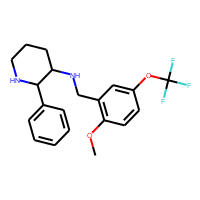

In [15]:
mols = []
for featureMass in predictedSubset['Feature_MASS'].unique():
    rows = predictedSubset[predictedSubset['Feature_MASS'] == featureMass]
    mols = mols + [Chem.MolFromSmiles(x) for x in rows['SMILES']]
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
display(img)

In [16]:
for chem in predictedSubset['SMILES']:
    Draw.MolToFile(Chem.MolFromSmiles(chem), root_dir + '\Figures\MOLImage' +chem+ '.png')

## Find structures missed by CFMID but matched between predictions/reported and MS labeling

In [17]:
featureList = pd.read_csv(root_dir + '\Filtered_features\FeatureList_subset.csv')
#Clean naming of formula
featureList['Formula'] = featureList['Formula'].apply(lambda x: x.rsplit('Esi')[0] if 'Esi' in x else x.rsplit('_mfg')[0] if '_mfg' in x else x)
#Remove features that have a formula already identified in predictedSubset
featureList = featureList[~featureList['Formula'].isin(predictedSubset['FORMULA'])]

In [18]:
featureList

,index,Feature_ID,Formula,Score,Mass,Retention_Time,BlankG00,BlankG01,BlankG02,Gluc00,...,Super42,BlankSub_Median_Super4,BlankSub_Max_Median_ALLSamples_Super4,Has_Adduct_or_Loss,Is_Adduct_or_Loss,Adduct_or_Loss_Info,Annotation_Source,Formula_Clean,KMeans,orderCat
1,188,913,C9H10F3NO2,87.00,221.0658,5.632999,NaN,NaN,NaN,69943.0,...,959171.0,609808.0,609808.0,0,0,NaN,Suspect,C9H10F3NO2,14,1
2,150,857,C4H15N4O2,75.88,151.1205,3.358999,NaN,NaN,NaN,693253.0,...,1018668.0,1018668.0,1018668.0,0,0,NaN,MFG,C4H15N4O2,14,3


In [19]:
allSus = pd.read_csv('L:\\Lab\\NCCT_ExpoCast\\ExpoCast2020\\SSA-Metabolism\\CaseStudy\\metabolite_masterList.csv')
allSus = allSus.fillna('None')
allSus = allSus[allSus['Parent_DTXSID'] == parentDTXSID]
allSus['Metabolite_INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in allSus['SMILES']]

In [20]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
1914,DTXSID9047251,None,C=O,CH2O,30.010565,False,True,0,0,1,1,0,WSFSSNUMVMOOMR-UHFFFAOYSA-N
1915,DTXSID9047251,None,COc1ccc(OC(F)(F)F)cc1CNC1C(O)CCNC1c1ccc(O)cc1,C20H23F3N2O4,412.160992,False,True,0,0,1,0,0,XNEQHGJZPNQJPO-UHFFFAOYSA-N
1916,DTXSID9047251,None,COc1ccc(OC(F)(F)F)cc1CNC1C(O)CCNC1c1ccccc1,C20H23F3N2O3,396.166077,False,True,0,0,1,1,0,LCYXJQLQOKHPDD-UHFFFAOYSA-N
1917,DTXSID9047251,None,COc1ccc(OC(F)(F)F)cc1CNC1CCCNC1C1=CC(O)C(O)C=C1,C20H25F3N2O4,414.176642,False,True,0,0,1,0,0,NFJZHAPWTCNVFJ-UHFFFAOYSA-N
1918,DTXSID9047251,None,COc1ccc(OC(F)(F)F)cc1CNC1CCCNC1C1=CC2OC2C=C1,C20H23F3N2O3,396.166077,False,True,0,0,1,0,0,TWVNCKBPSGYCCP-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,DTXSID9047251,DTXSID201025055,OC1=C(CN[C@H]2CCC(=O)N[C@H]2C2=CC=CC=C2)C=C(OC...,C19H19F3N2O3,380.134777,False,False,0,0,0,0,1,WTOFKKRGFDDJKR-YJBOKZPZSA-N
2056,DTXSID9047251,DTXSID701025305,COC1=C(C=C(OC(F)(F)F)C=C1)C(=O)N[C@H]1CCCN[C@H...,C20H21F3N2O3,394.150427,False,False,0,0,0,0,1,FZWWDTFJLHXJOB-WMZOPIPTSA-N
2057,DTXSID9047251,DTXSID601025302,COc1ccc(OC(F)(F)F)c(O)c1CNC1CCCNC1c1ccccc1,C20H23F3N2O3,396.166077,True,False,0,0,0,0,1,IRGCNWHHEPZXDG-UHFFFAOYSA-N
2058,DTXSID9047251,DTXSID601025302,COc1c(O)cc(OC(F)(F)F)cc1CNC1CCCNC1c1ccccc1,C20H23F3N2O3,396.166077,True,True,0,0,0,0,1,ANOWPINBSXXOTC-UHFFFAOYSA-N


In [21]:
for idx, compound in featureList.iterrows():
    formulaFilter = allSus['Formula'].str.contains(compound['Formula'])
    if sum(formulaFilter) == 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': allSus.loc[formulaFilter, 'SMILES'].values[0],
                                 'Identifier_Level' : 'Structure - MS1',
                                 'InChIKey' : allSus.loc[formulaFilter, 'Metabolite_INCHIKEY'].values[0],
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 0:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula',
                                 'InChIKey' :  None,
                                 'Confidence' : '4',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        
        identificationDF = identificationDF.append(tmpDF)

In [22]:
identificationDF.sort_values(by = 'Confidence')

,Feature_Mass,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_Score
648,380.1692,COC1=C(CNC2CCCNC2C2=CC=CC=C2)C=C(OC(F)(F)F)C=C1,Structure - MS2,ZIWFCOIGUNPHPM-UHFFFAOYSA-N,2b,NaN,1.0
1,221.0658,COC1=CC=C(OC(F)(F)F)C=C1CN,Structure - MS1,JGFONUZHXXBGTF-UHFFFAOYSA-N,3,87.00,None
2,151.1205,C4H15N4O2,Formula,None,4,75.88,None


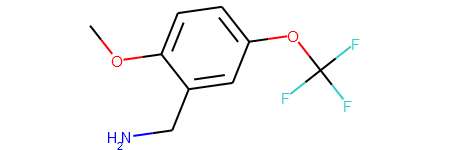

In [23]:
Chem.MolFromSmiles('COC1=CC=C(OC(F)(F)F)C=C1CN')

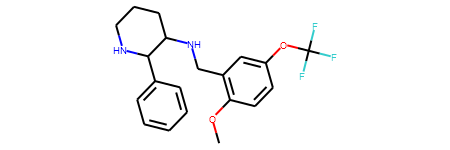

In [24]:
Chem.MolFromSmiles('COC1=C(CNC2CCCNC2C2=CC=CC=C2)C=C(OC(F)(F)F)C=C1')

In [25]:
matchedDF = allSus[(allSus['Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) | (allSus['Reported'] == 1)]
matchedDF

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
1931,DTXSID9047251,DTXSID20379381,O=C(O)c1cc(OC(F)(F)F)ccc1O,C8H5F3O4,222.013993,False,True,0,1,0,0,1,HNYMLXYADOZCNY-UHFFFAOYSA-N
1940,DTXSID9047251,None,COc1ccc(OC(F)(F)F)cc1CNC1CCCNC1c1ccccc1,C20H23F3N2O2,380.171163,False,True,0,1,0,0,0,ZIWFCOIGUNPHPM-UHFFFAOYSA-N
1950,DTXSID9047251,DTXSID101024959,[H]C1(NCC2=CC(OC(F)(F)F)=CC=C2O)CCCNC1([H])C1=...,C19H21F3N2O2,366.155513,False,True,1,0,0,0,1,IZRHKURJIQCXMT-UHFFFAOYSA-N
1960,DTXSID9047251,None,COC1=CC=C(OC(F)(F)F)C=C1CN,C9H10F3NO2,221.066363,False,True,1,0,0,0,0,JGFONUZHXXBGTF-UHFFFAOYSA-N
1985,DTXSID9047251,DTXSID101024961,[H]C1(NCC2=C(O)C=CC(OC(F)(F)F)=C2O)CCCNC1([H])...,C19H21F3N2O3,382.150427,True,False,1,0,0,0,1,XNYHZVYYXVTJRR-UHFFFAOYSA-N
1986,DTXSID9047251,DTXSID101024961,[H]C1(NCC2=CC(OC(F)(F)F)=C(O)C=C2O)CCCNC1([H])...,C19H21F3N2O3,382.150427,True,False,1,0,0,0,1,IDMBWPVHXMBXNO-UHFFFAOYSA-N
2048,DTXSID9047251,DTXSID9047251,COC1=C(CN[C@H]2CCCN[C@H]2C2=CC=CC=C2)C=C(OC(F)...,C20H23F3N2O2,380.171163,False,False,0,0,0,0,1,ZIWFCOIGUNPHPM-HKUYNNGSSA-N
2049,DTXSID9047251,DTXSID601025033,O[C@@H]1[C@@H](O)[C@H](OCC2=C(O)C=CC(OC(F)(F)F...,C14H15F3O9,384.066817,False,False,0,0,0,0,1,NGYLHVIZQVWSDZ-XPORZQOISA-N
2050,DTXSID9047251,DTXSID001025035,COC1=C(CN[C@@H]2[C@@H](NC(=O)CC2=O)C2=CC=CC=C2...,C20H19F3N2O4,408.129692,False,False,0,0,0,0,1,SQBCTTVGKCSVTP-OALUTQOASA-N
2051,DTXSID9047251,DTXSID701025036,O[C@@H]1[C@@H](O)[C@H](OC2=C(CN[C@@H]3CCC(=O)N...,C25H27F3N2O9,556.166865,False,False,0,0,0,0,1,UISIXNZJPIKOEN-HLACATRISA-N


In [26]:
modelList = ['ToolBox', 'Meteor', 'BioTransformer', 'TIMES', 'Reported']

aggGroup = allSus[allSus['Parent_DTXSID'].isin(['DTXSID4034150'])]
performanceMap = pd.DataFrame(data = None, columns=['Model','Total','Unique','NTA_Match_Count'])
performanceMap['Model'] = modelList
performanceMap['Total'] = list(allSus[modelList].sum(axis=0))
performanceMap['Unique'] = [sum((allSus[match] == 1.0) & (allSus[modelList].sum(axis = 1) == 1)) for match in modelList]
performanceMap['NTA_Match_Count'] = [sum(allSus.loc[allSus[match] == 1,'Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) for match in modelList]


In [27]:
performanceMap

,Model,Total,Unique,NTA_Match_Count
0,ToolBox,12,7,0
1,Meteor,23,19,1
2,BioTransformer,84,79,1
3,TIMES,7,2,0
4,Reported,16,12,0


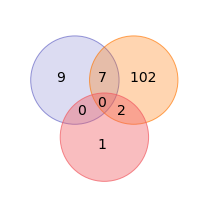

In [44]:
bt_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Meteor'] > 0])
times_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['ToolBox'] > 0])

silico_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if (row['ToolBox'] > 0 or row['BioTransformer'] > 0 or row['Meteor'] > 0 or row['TIMES'] > 0)])
lit_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Reported'] > 0])
vitro_venn = set([row['InChIKey'] if row['Identifier_Level'] != 'Formula' else row['Identifier'] for idx, row in identificationDF.iterrows() if row['InChIKey'] != parentINCHIKEY]) 

labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]], figsize = (3,3))
ax.get_legend().remove()
comp = 'CP122721'
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_GenOverlap.tiff', dpi = 300)

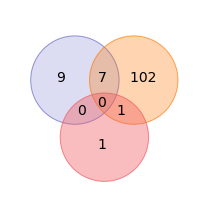

In [45]:
#Lowering the match between predicted and measured, including parent
labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
labels['011'] = '1 '
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]], figsize = (3,3))
ax.get_legend().remove()
comp = 'CP122721'
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_GenOverlap.tiff', dpi = 300)

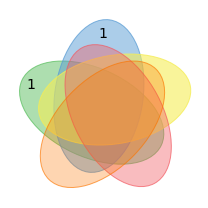

In [43]:
#Find overlapping metabolites 
bt_union = bt_venn.intersection(vitro_venn)
meteor_union = meteor_venn.intersection(vitro_venn)
times_union = times_venn.intersection(vitro_venn)
tb_union = tb_venn.intersection(vitro_venn)
lit_union = lit_venn.intersection(vitro_venn)

labels = venn.get_labels([bt_union, meteor_union, times_union, tb_union, lit_union],fill=['number'])
for k in labels:
    if labels[k] == '0 ':
        labels.update({k : ''})
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'], figsize = (3,3))
ax.get_legend().remove()
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_SilicoOverlap.tiff', dpi = 300)